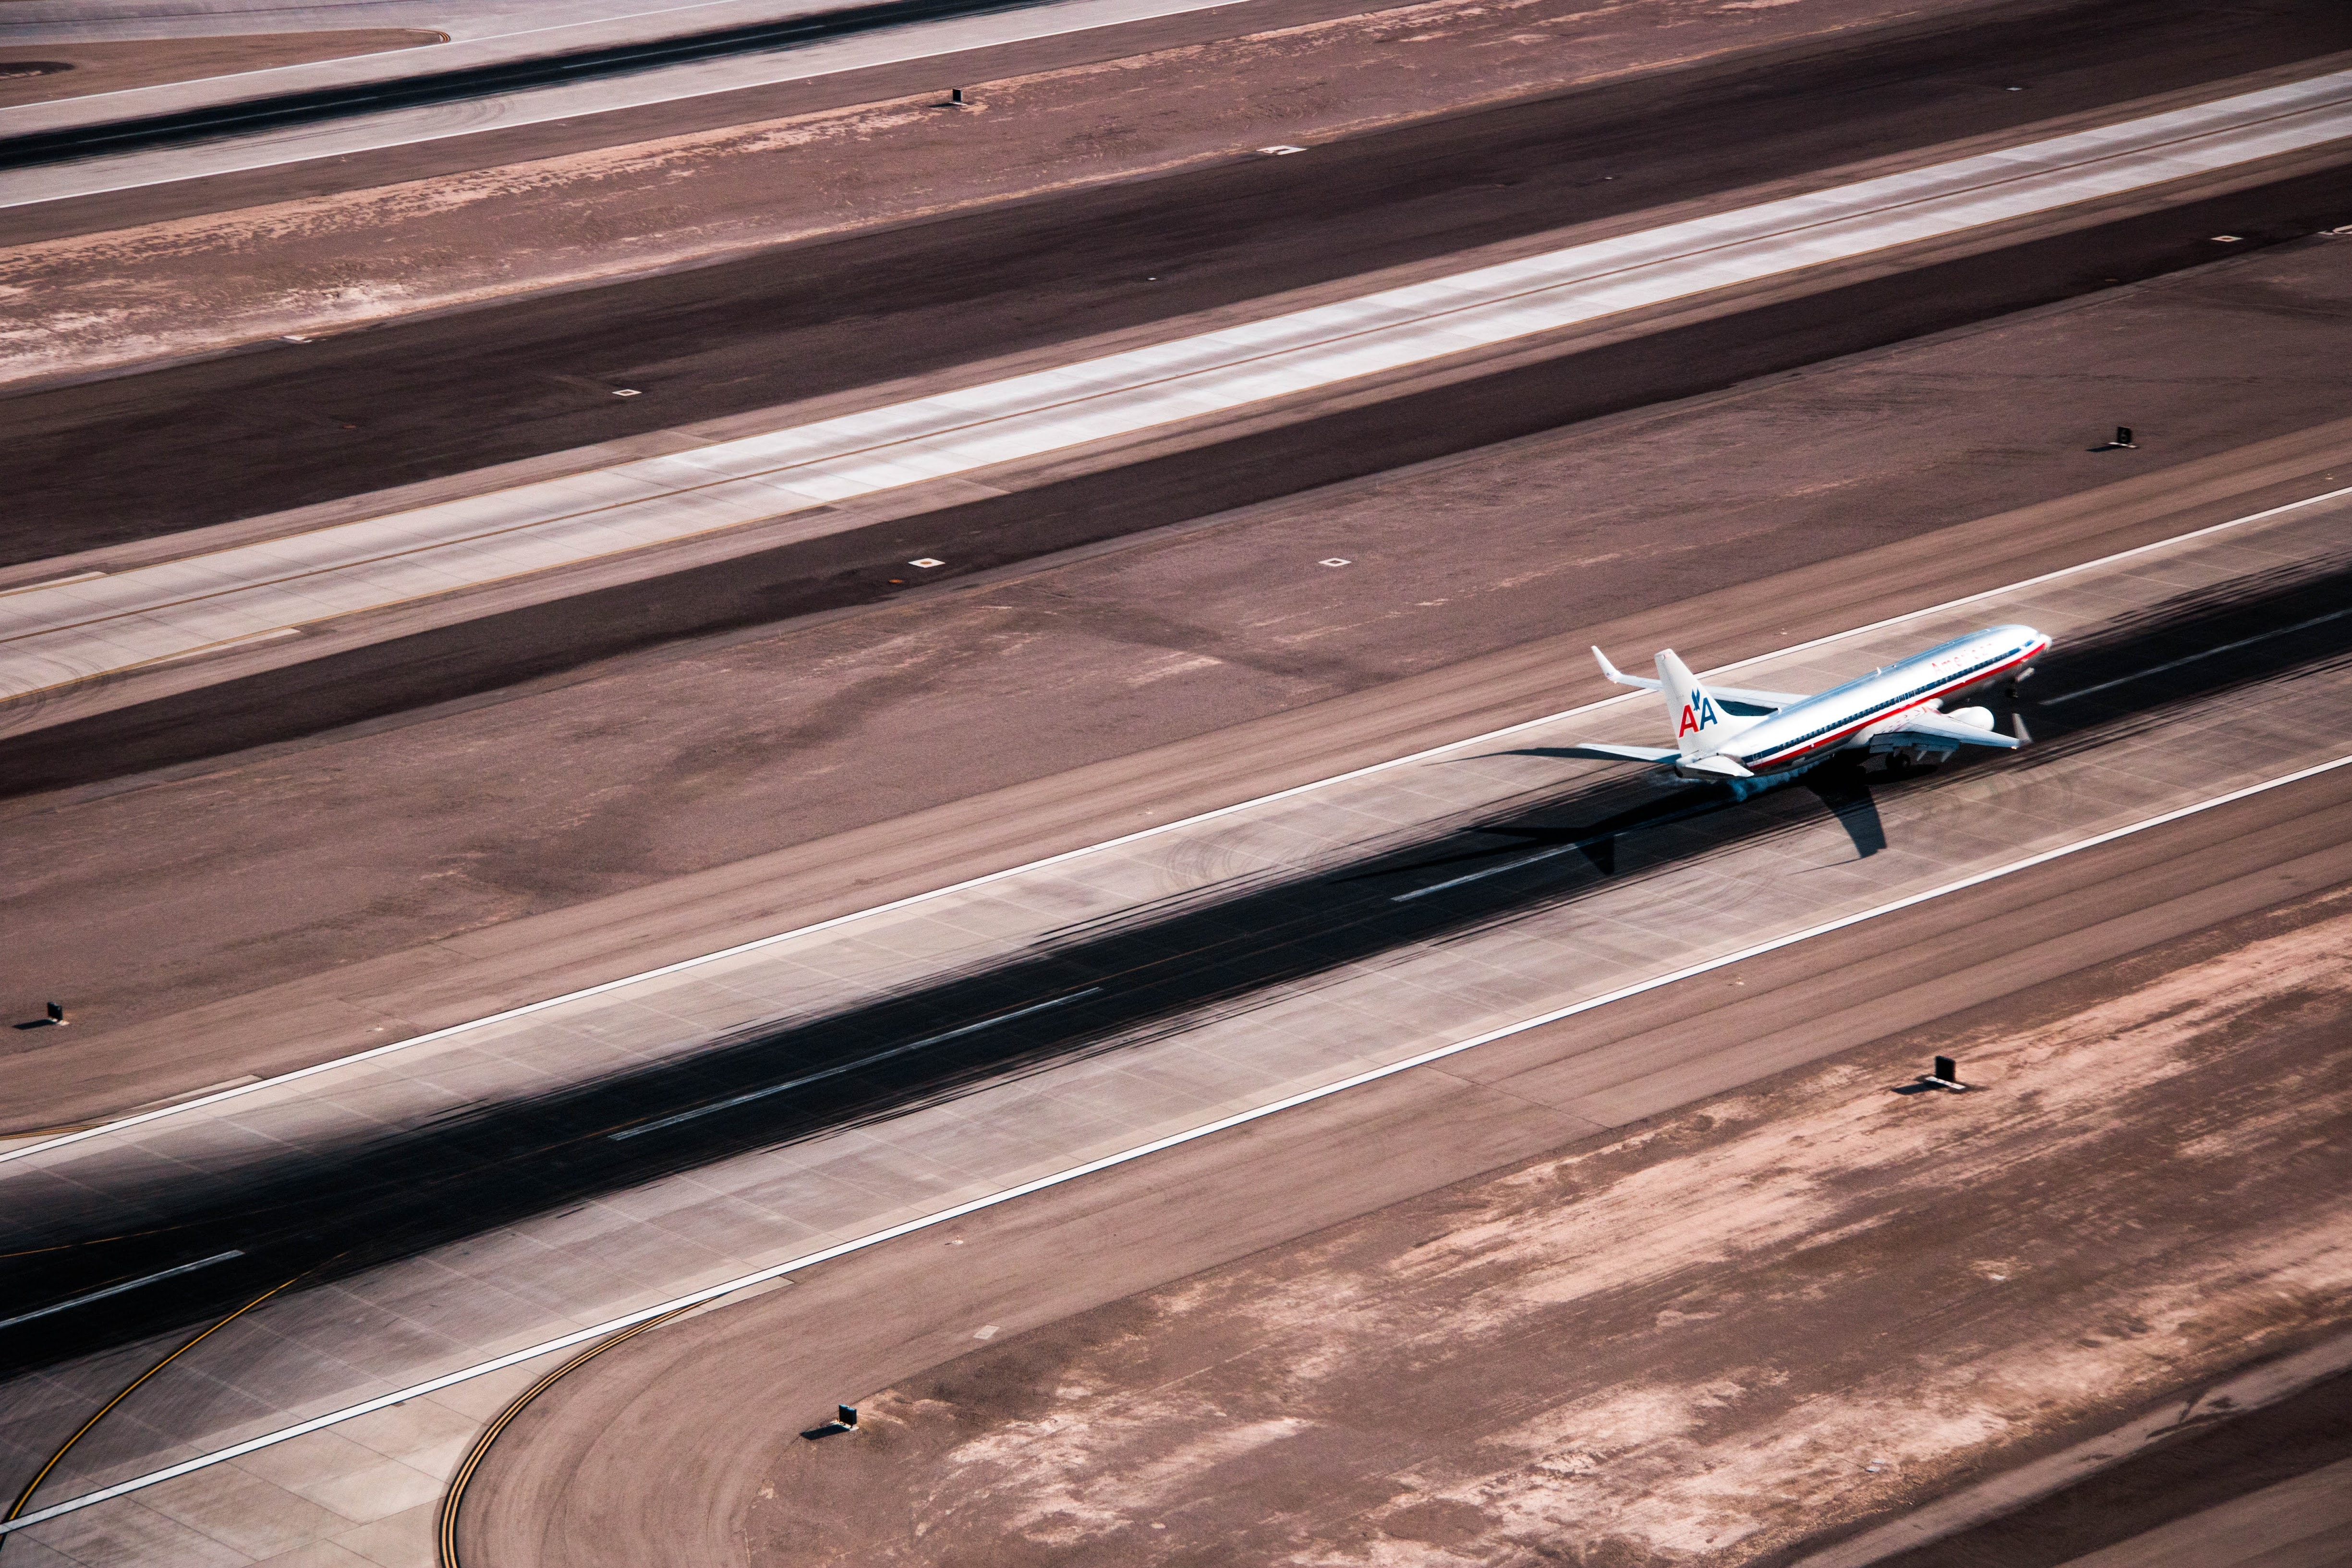

# Capstone Project: Airline Delays

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 13-15, 2023**

Garrett Becker

____
____
## Part 5: Principal Component Analysis
____
____

____
## Imports and Setup
____

** Import modules **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [2]:
df = pd.read_csv('airlines_delay.csv')

In [3]:
df.head()

Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0  2313.0  1296.0   141.0      DL         ATL       HOU          1      0
1  6948.0   360.0   146.0      OO         COS       ORD          4      0
2  1247.0  1170.0   143.0      B6         BOS       CLT          3      0
3    31.0  1410.0   344.0      US         OGG       PHX          6      0
4   563.0   692.0    98.0      FL         BMI       ATL          4      0

** Fix NaN values **

In [4]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Flight, Time, Length, Airline, AirportFrom, AirportTo, DayOfWeek, Class]
Index: []

** Make dummy variables for airlines and airports  **

In [5]:
airline_labels = ['Airline']
df = pd.get_dummies(df, columns=airline_labels, drop_first=False)

In [6]:
airportfrom_labels = ['AirportFrom']
df = pd.get_dummies(df, columns=airportfrom_labels, drop_first=False)

In [7]:
airportto_labels = ['AirportTo']
df = pd.get_dummies(df, columns=airportto_labels, drop_first=False)

In [8]:
df

Flight    Time  Length  DayOfWeek  Class  Airline_9E  Airline_AA  \
0       2313.0  1296.0   141.0          1      0           0           0   
1       6948.0   360.0   146.0          4      0           0           0   
2       1247.0  1170.0   143.0          3      0           0           0   
3         31.0  1410.0   344.0          6      0           0           0   
4        563.0   692.0    98.0          4      0           0           0   
...        ...     ...     ...        ...    ...         ...         ...   
539377  6973.0   530.0    72.0          5      1           0           0   
539378  1264.0   560.0   115.0          4      1           0           0   
539379  5209.0   827.0    74.0          2      1           0           0   
539380   607.0   715.0    65.0          4      1           0           0   
539381  6377.0   770.0    55.0          2      1           0           0   

        Airline_AS  Airline_B6  Airline_CO  ...  AirportTo_TXK  AirportTo_TYR  \
0                0           0           0  ...              0              0   
1                0           0           0  ...              0              0   
2                0           1           0  ...              0              0   
3                0           0           0  ...              0              0   
4                0           0           0  ...              0              0   
...            ...         ...         ...  ...            ...            ...   
539377           0           0           0  ...              0              0   
539378           0           0           0  ...              0              0   
539379           0           0           0  ...              0              0   
539380           0           0           0  ...              0              0   
539381           0           0           0  ...              0              0   

        AirportTo_TYS  AirportTo_UTM  AirportTo_VLD  AirportTo_VPS  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
539377              0              0              0              0   
539378              0              0              0              0   
539379              0              0              0              0   
539380              0              0              0              0   
539381              0              0              0              0   

        AirportTo_WRG  AirportTo_XNA  AirportTo_YAK  AirportTo_YUM  
0                   0              0              0              0  
1                   0              0              0              0  
2                   0              0              0              0  
3                   0              0              0              0  
4                   0              0              0              0  
...               ...            ...            ...            ...  
539377              0              0              0              0  
539378              0              0              0              0  
539379              0              0              0              0  
539380              0              0              0              0  
539381              0              0              0              0  

[539382 rows x 609 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Columns: 609 entries, Flight to AirportTo_YUM
dtypes: float64(3), int64(2), uint8(604)
memory usage: 331.3 MB


____
## Principal Component Analysis
____

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)

In [12]:
scaled_data

array([[-0.05558979,  1.77407013,  0.12547455, ..., -0.04567665,
        -0.01028045, -0.02504069],
       [ 2.18632432, -1.59228795,  0.19678395, ..., -0.04567665,
        -0.01028045, -0.02504069],
       [-0.57120585,  1.32090654,  0.15399831, ..., -0.04567665,
        -0.01028045, -0.02504069],
       ...,
       [ 1.3451833 ,  0.08729455, -0.83007146, ..., -0.04567665,
        -0.01028045, -0.02504069],
       [-0.88076896, -0.31551753, -0.95842839, ..., -0.04567665,
        -0.01028045, -0.02504069],
       [ 1.91013598, -0.11770802, -1.10104719, ..., -0.04567665,
        -0.01028045, -0.02504069]])

** PCA Object **

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

** Transform data into two principal components **

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(539382, 609)

In [17]:
x_pca.shape

(539382, 2)

Text(0, 0.5, 'Second Principal Component')

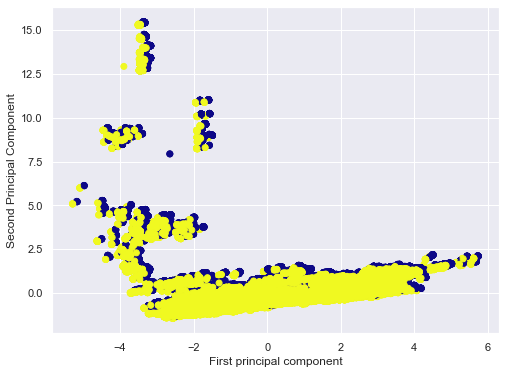

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Class'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

** Interpreting **

In [19]:
pca.components_

array([[ 0.51463646, -0.0077815 , -0.28002111, ...,  0.03120821,
        -0.01107044,  0.01587528],
       [ 0.06657645,  0.011238  , -0.08411462, ...,  0.00398325,
         0.00065342,  0.01648483]])

In [20]:
df_comp = pd.DataFrame(pca.components_, columns=df.keys())

<AxesSubplot:>

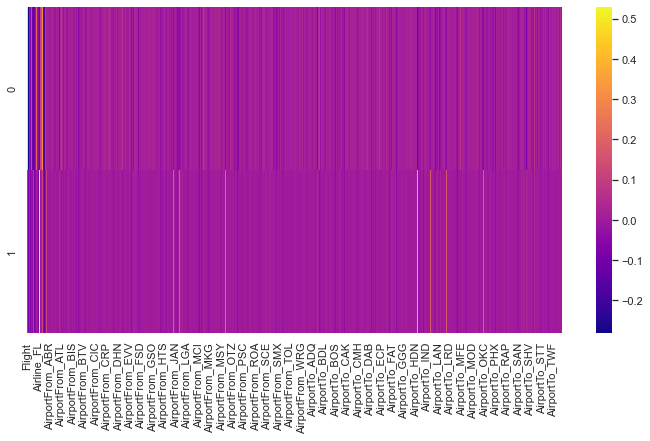

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

In [22]:
df_comp.head()

Flight      Time    Length  DayOfWeek     Class  Airline_9E  Airline_AA  \
0  0.514636 -0.007781 -0.280021  -0.004743 -0.058591    0.134083   -0.100452   
1  0.066576  0.011238 -0.084115   0.008017 -0.063683   -0.011233   -0.038502   

   Airline_AS  Airline_B6  Airline_CO  ...  AirportTo_TXK  AirportTo_TYR  \
0   -0.138423   -0.115739   -0.103411  ...       0.005867       0.005098   
1    0.077308   -0.066187   -0.049636  ...       0.001037       0.000834   

   AirportTo_TYS  AirportTo_UTM  AirportTo_VLD  AirportTo_VPS  AirportTo_WRG  \
0        0.03248       0.000339       0.014017       0.028058      -0.013196   
1        0.00100      -0.001982       0.000752       0.001573       0.004373   

   AirportTo_XNA  AirportTo_YAK  AirportTo_YUM  
0       0.031208      -0.011070       0.015875  
1       0.003983       0.000653       0.016485  

[2 rows x 609 columns]